In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', size = 12)
from IPython.display import Latex, Math
from IPython.display import Image
from IPython.core.display import display,HTML

## The data

### Source

The temperature and precipitation data were obtained from the [WorldClim - Global Climate Data] (http://www.worldclim.org/current) database. The resulotion is 10' on an equidistant lattitude and longitude grid. Please note this leads to increasing weight to points advancing towards the polar regions. The Koppen classification can be found at WORLD MAPS OF [Koppen--Geiger Climate Classification page](http://koeppen-geiger.vu-wien.ac.at/) of Universitat Wien. The data cover most of the landmass save for the Antarctica.

The two datasets were projected onto a common grid and saved to a csv store.

### Structure

The loaded from the store have roughly 64,00 points:

In [3]:
path_to_store = r'C:\Users\hornu\OneDrive\Documents\personal\balazs-personal\balazs-personal\repos\Weather\data\climate\temperature-precipitation-cls.csv'
df = pd.read_csv(path_to_store, index_col = 0 )

print("Number of records: {0}".format(len(df)))

Number of records: 64409


The fields in the column header have the following meaning:

* `Lat` : lattitude in degrees
* `Lon` : longitude in degrees
* `Cls` : Koppen climate label
* `2-13` : monthly average in temperature in $10 \cdot \text{C}^{\circ}$  from January to December.
* `14-25` : monthly average precipitation in milimetres from January to December.

In [4]:
df.head()

,Lat,Lon,Cls,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
1,-55.75,-67.75,ET,86.0,83.0,76.0,56.0,36.0,20.0,15.0,...,86.0,81.0,75.0,66.0,67.0,63.0,51.0,51.0,75.0,66.0
2,-55.75,-67.25,ET,83.0,80.0,73.0,53.0,32.0,17.0,12.0,...,72.0,70.0,61.0,53.0,52.0,55.0,44.0,43.0,58.0,59.0
3,-55.25,-70.75,ET,88.0,86.0,76.0,57.0,40.0,25.0,21.0,...,145.0,132.0,121.0,113.0,105.0,107.0,103.0,92.0,105.0,107.0
4,-55.25,-70.25,ET,88.0,86.0,76.0,57.0,39.0,24.0,20.0,...,131.0,119.0,110.0,104.0,95.0,97.0,90.0,80.0,95.0,96.0
5,-55.25,-69.75,ET,71.0,69.0,59.0,39.0,20.0,6.0,2.0,...,120.0,108.0,99.0,94.0,86.0,88.0,80.0,72.0,89.0,88.0


The latitude and longitude columns are removed for they will not be used in the following.

In [5]:
df.drop(['Lat', 'Lon'], axis = 1, inplace = True)

### Preliminary checks

A quick sanity check is worth the time:

In [6]:
df.describe()

,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,25
count,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,...,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000,64409.000000
mean,-19.496421,-7.391420,27.436694,76.984102,124.579748,160.791535,178.200174,170.462063,139.925818,92.115248,...,55.060628,53.122390,56.857893,63.541989,73.573740,73.104815,64.611576,58.248350,54.097471,54.739369
std,221.942406,218.333765,199.267312,164.706627,126.037252,99.320742,88.278280,91.803491,111.517567,146.584784,...,75.628189,67.982472,70.617548,79.706175,90.766774,84.688932,72.526402,66.720411,66.163412,74.047716
min,-512.000000,-469.000000,-442.000000,-357.000000,-206.000000,-116.000000,-82.000000,-95.000000,-165.000000,-275.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-219.000000,-199.000000,-130.000000,-41.000000,35.000000,94.000000,119.000000,107.000000,56.000000,-22.000000,...,11.000000,13.000000,14.000000,14.000000,19.000000,20.000000,19.000000,17.000000,13.000000,11.000000
50%,-29.000000,-12.000000,34.000000,88.000000,135.000000,160.000000,180.000000,172.000000,142.000000,94.000000,...,24.000000,28.000000,34.000000,43.000000,52.000000,53.000000,44.000000,36.000000,30.000000,25.000000
75%,214.000000,221.000000,229.000000,230.000000,232.000000,243.000000,249.000000,248.000000,242.000000,238.000000,...,64.000000,62.000000,67.000000,78.000000,88.000000,89.000000,80.000000,71.000000,67.000000,63.000000
max,337.000000,332.000000,331.000000,339.000000,359.000000,384.000000,392.000000,382.000000,357.000000,325.000000,...,609.000000,707.000000,759.000000,1471.000000,1728.000000,1232.000000,903.000000,919.000000,802.000000,705.000000


The precipitation data have a distribution heavily skewed by outliers. This is best visualised by the plotting the density and cumulative distribution functions along with the (0.1, 0.2, 0.3, ..., 0.9, 0.99) qunatiles in the top row of the figure below. 

In [7]:
df_deciles = df.describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]).drop(['count', 'mean', 'std'])

The box plots of the monthly data in the middle row also emphasises the presence of a large number of outliers. The temperature and precipitation data are on different scales 

In [8]:
# TO HIDE

def plot_mean_std(df_, ax, title, with_legend = True):
    
    df_st_ = df_.agg(['mean', 'std'])
        
    ax.scatter(np.arange(12), df_st_.loc['mean', : '13'], s =  2* np.sqrt(df_st_.loc['std', '2': '13']), 
                color = 'teal', alpha = 0.6, label = 'mean temp.' ) 
    
    ax.scatter(np.arange(12), df_st_.loc['mean', '14':], s = 2 * np.sqrt(df_st_.loc['std', '14' : '25']), 
                color = 'purple', alpha = 0.8, label = 'mean precip.' )
    
    ax.text(0.05, 0.05, title,
                        verticalalignment = 'bottom', horizontalalignment='left',
                        transform = ax.transAxes)
    ax.grid(True)
    if with_legend:
        ax.legend()

In [9]:
# TO HIDE

def plot_histo_with_quantiles(X, bins, color, label, ax, quantiles = None):
    
    hist, bins_ = np.histogram(X, bins = bins)
    freq = hist/np.sum(hist)
    
    ax.bar(bins_[:-1], freq, align = "edge", width = np.diff(bins_), color = color, alpha = 0.5)
    
    ax.hist(X, bins, density = True, histtype='step',
                 cumulative = True, label = label, color = color)
    
    ax.set_ylabel(r'$P({0})$'.format(label))
    
    if quantiles is None:
        quantiles_ = np.array([0.0, 10, 25, 50, 75, 90, 99])
    
    elif not isinstance(quantiles, np.ndarray):
        quantiles_ = np.array(quantiles)
        
    q_positions = np.percentile(X, quantiles_)
    ax.vlines(q_positions, ymin = 0.0, ymax = 1.0, linestyles = 'dashed', linewidth = 0.5)
    
    ax.legend(loc = 1)

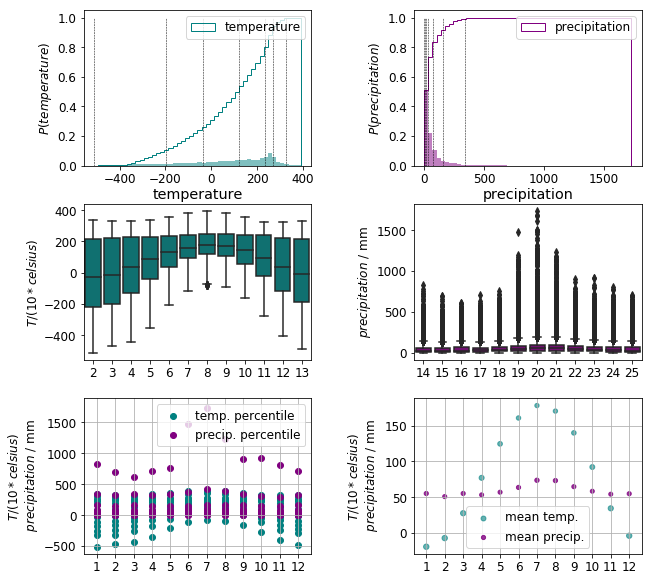

In [10]:
# TO HIDE

fig, axes = plt.subplots(3, 2,  gridspec_kw = {'hspace' : 0.25, 'wspace' : 0.45})
fig.set_size_inches(10, 10)

plot_histo_with_quantiles(df.loc[:,'2':'13'].values.ravel(), 50, 'teal', 'temperature', axes[0, 0])
plot_histo_with_quantiles(df.loc[:,'14':'25'].values.ravel(), 50, 'purple', 'precipitation', axes[0, 1])

# mean and std
plot_mean_std(df, axes[2, 1], '')

axes[1, 0].set_ylabel('$T / (10 * celsius)$')
axes[1, 1].set_ylabel('$precipitation$ / mm')

axes[1, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
axes[1, 1].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

sns.boxplot(data = df.loc[:, '2' : '13'], ax = axes[1, 0], color = 'teal').set_title('temperature')
sns.boxplot(data = df.loc[:, '14' : '25'], ax = axes[1, 1], color = 'purple').set_title('precipitation')

axes[2, 0].set_ylabel('$T / (10 * celsius)$ \n $precipitation$ / mm')
axes[2, 1].set_ylabel('$T / (10 * celsius)$ \n $precipitation$ / mm')

axes[2, 0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axes[2, 1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axes[2, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
axes[2, 1].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# percentiles
for idx, v in enumerate(df_deciles.values[:,:12].T):
    label = [None, 'temp. percentile'][idx == 0]
    axes[2,0].scatter(np.full_like(v, idx), v, color = 'teal', label = label)
 
for idx, v in enumerate(df_deciles.values[:,12:].T):
    label = [None, 'precip. percentile'][idx == 0]
    axes[2,0].scatter(np.full_like(v, idx), v, color = 'purple', label = label)
 
axes[2,0].legend(loc = 1) 
axes[2, 0].grid(True)

plt.show()

We are foremost interested in how the observations are distributed within a class. For this end, the monthly mean temperature and precipitation and standard deviation thereof are calculated for all climates to see where they are positioned on a common scale. It is apparent that the temperature data encompass a range five to ten times larger than that of the the precipiation data 

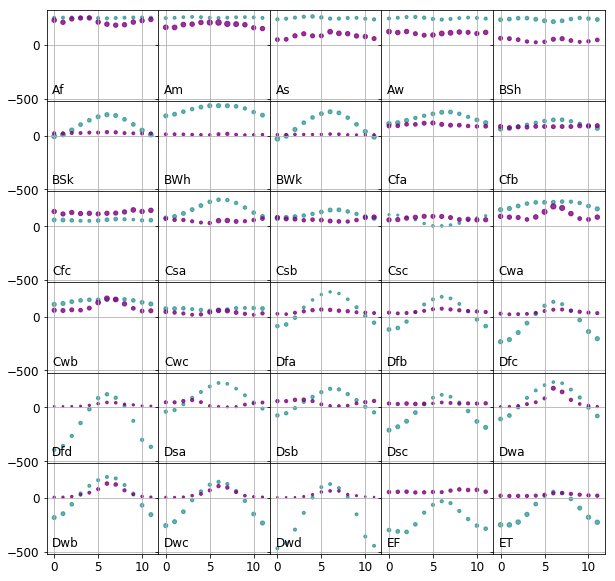

In [11]:
# TO HIDE

groups = df.groupby('Cls')

fig, axes = plt.subplots(6, 5, sharex = True, sharey = True, gridspec_kw = {'hspace' : 0, 'wspace' : 0})
fig.set_size_inches(10, 10)

for ax, (name, group) in zip(axes.flat, groups):
    plot_mean_std(group, ax, name, with_legend = False)
    
plt.show()

Ideally all of the features should be on similar scales, because it would make the distances in each feature subspace comparable. An other desirable property that each feature of each class is normally distributed. It would enable us to use methods require normally distributed data, such as disscriminant analysis. Thus we will attempt to:

* Bring the temperature and precipitation data to similar scales
* Further transform them to approximately normal distribution.

`StandardScaler` and `MinMaxScaler` are out of question for they cannot handle outliers. The outliers have two effects. Firstly, using the minmax scaler, the ranges where the bulk of the data lays would be squashed due to the large value of the outlying points. Secondly, the variance would be two large, which would again result in constraining the meaningful data to a small range. Secondly, the variance would be inflated by the spread of the small number outliers, and it would reflect the variance of the bulk of the data. Therefore performing any variance based tranformation, such as PCA, or fitting, e.g. discriminant analysis, would potentially lead to information loss.

`RobustScaler` uses specific quantiles to scale the data. Choosing the quantile range carefully, say 0.10 to 0.90, would avoid squasing the data, but they still would be riddled with outliers.

The transform that we are apply to the data circumvents both problems. It is the Yeo--Johnson power transform. It rescales the datum individually to an approximate normal distribution, then the transformed distribution is scaled by the variance. In this manner the temperature and precipitation data sets are moved to similar ranges.

In [12]:
from sklearn.preprocessing import power_transform

temp_trf = power_transform(df.loc[:, '2' : '13'].values.reshape(-1, 1), method = 'yeo-johnson') 
                       # with_centering = False, quantile_range = (00.0, 99.0)) 

precip_trf = power_transform(df.loc[:, '14' : '25'].values.reshape(-1, 1), method = 'yeo-johnson')
                               #        with_centering = False, quantile_range = (0.0, 99.0))

# create new dataframe of the transformed values
df_trf = pd.DataFrame(data = np.concatenate([temp_trf.reshape(-1, 12), precip_trf.reshape(-1, 12)], axis = 1),   
                      columns = [str(x) for x in range(2, 26)])   
 
df_trf['Cls'] = df['Cls'].values

As we can see in the top row of the plot below, the 0th and 99th percentiles of the temperature and precipitation distributions are positioned close to each other. The number and distance of the outliers are greatly reduced as indicated by the middlerow. These changes are further confirmed by the scatter plots of the monthly data in the bottom row. 

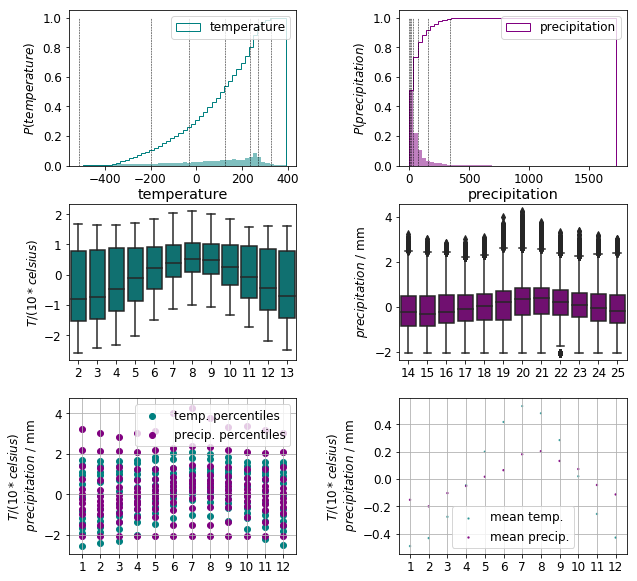

In [13]:
# TO HIDE

df_trf_deciles = df_trf.describe(percentiles = [.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]).drop(['count', 'mean', 'std'])

fig, axes = plt.subplots(3, 2,  gridspec_kw = {'hspace' : 0.25, 'wspace' : 0.45})
fig.set_size_inches(10, 10)

plot_histo_with_quantiles(df.loc[:,'2':'13'].values.ravel(), 50, 'teal', 'temperature', axes[0, 0])
plot_histo_with_quantiles(df.loc[:,'14':'25'].values.ravel(), 50, 'purple', 'precipitation', axes[0, 1])

# mean and std
plot_mean_std(df_trf, axes[2, 1], '')

axes[1, 0].set_ylabel('$T / (10 * celsius)$')
axes[1, 1].set_ylabel('$precipitation$ / mm')

axes[1, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
axes[1, 1].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

sns.boxplot(data = df_trf.loc[:, '2' : '13'], ax = axes[1, 0], color = 'teal').set_title('temperature')
sns.boxplot(data = df_trf.loc[:, '14' : '25'], ax = axes[1, 1], color = 'purple').set_title('precipitation')

axes[2, 0].set_ylabel('$T / (10 * celsius)$ \n $precipitation$ / mm')
axes[2, 1].set_ylabel('$T / (10 * celsius)$ \n $precipitation$ / mm')

axes[2, 0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axes[2, 1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
axes[2, 0].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
axes[2, 1].set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

# percentiles
for idx, v in enumerate(df_trf_deciles.values[:,:12].T):
    label = [None, 'temp. percentiles'][idx == 0]
    axes[2,0].scatter(np.full_like(v, idx), v, color = 'teal', label = label)
 
for idx, v in enumerate(df_trf_deciles.values[:,12:].T):
    label = [None, 'precip. percentiles'][idx == 0]
    axes[2,0].scatter(np.full_like(v, idx), v, color = 'purple', label = label)
 
axes[2,0].legend(loc = 1) 
axes[2, 0].grid(True)

plt.show()


The monthly precipitation and temperature values are now neatly positioned within the same range for all climates as shown in the plot below.

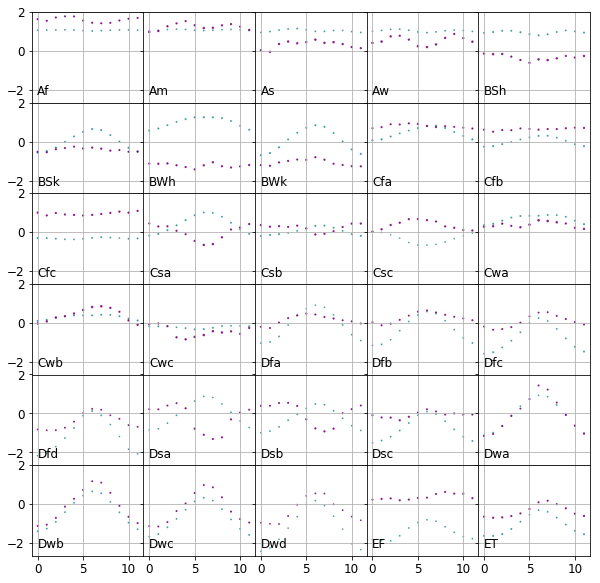

In [14]:
# TO HIDE

groups = df_trf.groupby('Cls')

fig, axes = plt.subplots(6, 5, sharex = True, sharey = True, gridspec_kw = {'hspace' : 0, 'wspace' : 0})
fig.set_size_inches(10, 10)

for ax, (name, group) in zip(axes.flat, groups):
    plot_mean_std(group, ax, name, with_legend = False)
    
plt.show()

### Feature engineering

In this section, we further transform the data to generate features can optimally used to establish classification rules.

Firstly, the Yeo--Johnson transformed data are saved in variable `X`:

In [15]:
X = df_trf.iloc[:, :-1].values

#### Label encoding

The literal class labels are converted to integer ones and stored in the vector `y`:

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df_trf['Cls'].values)
label_codes = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))

#### Dimensionality reduction

Before we proceed to select classifiers it is the most useful to investigate the cardinality of various classes. 

In [17]:
from collections import Counter
", ".join( "({0} : {1})".format(label_codes[x[0]], x[1]) for x in Counter(y).most_common())

'(Dfc : 10894), (ET : 7219), (BWh : 7193), (Aw : 5894), (Dfb : 4406), (BSk : 3273), (BSh : 3107), (Cfa : 2855), (Af : 2440), (Cfb : 2234), (EF : 1980), (BWk : 1838), (Am : 1778), (Cwa : 1501), (Dfd : 1410), (Dwc : 1315), (Csa : 996), (Dfa : 756), (Csb : 677), (Dwb : 651), (Cwb : 560), (Dwa : 313), (As : 276), (Dsc : 261), (Dsb : 207), (Cfc : 175), (Dwd : 100), (Dsa : 79), (Csc : 11), (Cwc : 10)'

There are four--five classes in which the number of samples are comparable to that of the dimension. Clearly, a dimensionality reduction would help here. We invoke our old friend principal component analysis (PCA).

It is readily seen that the first six principal components account for almost 99% of the total variance. This implies there is a chance to cluster the data in a projected subspace whose dimension is sufficiently smaller than the number of samples of almost all classes. 

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
variance_ratio = pca.explained_variance_ratio_

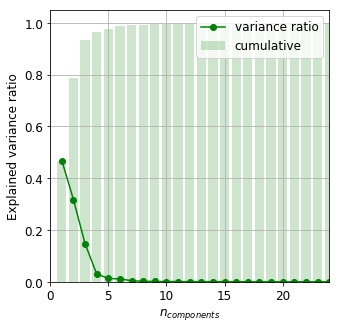

In [19]:
# TO HIDE

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)

x = np.arange(1, variance_ratio.size + 1)

ax.plot(x, variance_ratio, color = 'green', label = 'variance ratio', marker = 'o')
ax.bar(x, np.cumsum(variance_ratio), color = 'green', alpha = 0.2, label = 'cumulative')
ax.set_xlim((0, variance_ratio.size))

ax.set_ylabel('Explained variance ratio')
ax.set_xlabel(r'$n_{components}$')
ax.grid(True)
ax.legend(loc = 1)
plt.show()

## Classification

We now proceed to select a suitable method process the climate data from the plethora of classification algorithms.

### Nearest means

Because it is hard to choose, we create our classification method based on the class means. The set of labels are denoted by $L$. The cluster label, $l_{i}$ of the datum $i$ is that of the class whose mean $\mu_{j}$ is closest to the point in question:

$$
l_{i} = \underset{j \in L}{\operatorname{argmin}} ||\mu_{j} - x_{i}||_{2}\, .
$$

The partition above results in the Voronoi decomposition of the data around the class means. This method is implemented in the `NearestMeanClassifier` class

In [20]:
from sklearn.base import BaseEstimator
from sklearn.metrics.pairwise import pairwise_distances_argmin

class NearestMeanClassifier(BaseEstimator):
    
    def __init__(self):
        
        self._is_fitted = False
    
    def fit(self, X, y):
        """
        Calculates the class centres on a training sample.
        
        Parameters:
            X np.ndarray, (n_samples, n_features) : training observations
            y (n_samples) :  training class labels
        
        Returns:
            self
        """
        
        labels = np.unique(y)
        n_clusters = labels.size
        
        self.cluster_centers_ = np.zeros((n_clusters, X.shape[1]))
        self.cluster_labels_ = np.zeros(n_clusters, dtype = np.int)
        
        for idx, label in enumerate(labels):
            self.cluster_centers_[idx] = np.mean(X[y == label], axis = 0)
            self.cluster_labels_[idx] = label
            
        self._is_fitted = True
         
    def predict(self, X):
        """
        Returns the precited class labels on a test sample.
        Parameters:
            X np.ndarray, (n_samples, n_features) : obeservations
            
        Returns:
            labels_ np.ndarray, (n_samples) : predicted labels
        """
        
        if not self._is_fitted:
            raise ValueError("Classifier must be fit before prediction")
            
        label_positions = pairwise_distances_argmin(X, self.cluster_centers_)
        self.labels_ = self.cluster_labels_[label_positions]
        
        return self.labels_

The classification is carried out in the projected PCA space. A fivefold cross validation is invoked to determine the optimum number of principal components. Accuracy and adjusted rand score -- to account for the chance matches -- will measure the goodness of the classifier.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix, make_scorer

cv = KFold(n_splits = 5, shuffle = True)
pca = PCA()
classifier = NearestMeanClassifier()

pipeline = Pipeline([('pca', pca), ('classifier', classifier)])

param_grid_nmc = [{'pca__n_components' : [2, 4, 6, 8, 10, 12, 14]}]

scoring = scoring = {'ars': make_scorer(adjusted_rand_score), 'accuracy': make_scorer(accuracy_score)}

grid_nmc = GridSearchCV(pipeline, cv = cv, param_grid = param_grid_nmc, 
                        scoring = scoring, 
                        refit = False,
                        return_train_score = False)
_ = grid_nmc.fit(X, y)

In [22]:
# TO HIDE

from itertools import chain

def plot_grd_search_cv_results_1D(results, ax, cmap, **kwargs):
    
    score_mean_keys = filter(lambda x: x.startswith('mean_test_'), results.keys())
    score_means = {k[10:] : results[k] for k in score_mean_keys}
    
    score_std_keys = filter(lambda x: x.startswith('std_test_'), results.keys())
    score_stds = {k[9:] : results[k] for k in score_std_keys}
    
    flattened = [(k, score_means[k], score_stds[k]) for k in score_stds]    

    params = np.array(list(chain(*(x.values() for x in results['params']))))
    
    colors = [cmap(idx / len(flattened)) for idx in range(len(flattened))]
    
    for (name, mean, std), color in zip(flattened, colors):
        ax.errorbar(params, mean, yerr = std, color = color,
                    label = name, **kwargs)
   
    ax.legend(loc = 3)
    
    ax.set_ylabel('score')
    
    ax.set_xlim((0, np.max(params) + 1))
    ax.set_ylim((0, 1))
    
    ax.grid(True)

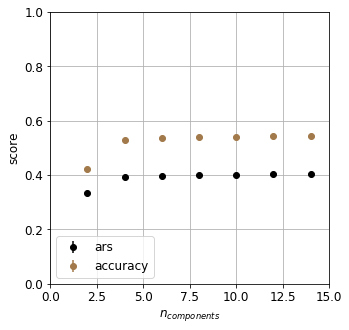

In [23]:
# TO HIDE

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)

ax.set_xlabel(r'$n_{components}$')

kwargs = {'fmt' : 'o'}
plot_grd_search_cv_results_1D(grid_nmc.cv_results_, ax, plt.get_cmap('cubehelix'),  **kwargs)
plt.show()

The classifier is surprisingly poor. What could the possible reasons be? We tactily required
*  the distributions being pairwise symmetric with respect to the dividing hyperplane.
* The distribution of each class is confined within its Voronoi boundary

These are really strict requirements which are not granted to have met.

In [24]:
# TO HIDE

from scipy.stats import chi2

def calculate_error_ellipse_2D_projection(covariance, p):
    """
    Calculates the 2D projections of an ND error ellipse.
    The ellipse contains p * 100 percent of the population 
    based on the sample covariance matrix estimate.
    
    Parameters:
        covariance (np.ndarray (N,N)) : covariance matrix
        p (float) 0 <= p <= 1 : probability 
    
    Returns:
        ellipse_parameters ([(int,int,float, float, float, float)]) :
            (int, int) : the indices of the projection axes, 
            (float, float) : axes of the ellipse
            (float) : rotation angle of  the major axis wert the first projection axis
            
        The quintuplet is calculated for each projection.
    """

    r2 = chi2.ppf(p, covariance.shape[0])

    ellipse_parameters = []

    # loop over doublets of indices
    
    n_dims = covariance.shape[0]
    gen = ((x, y) for x in range(n_dims) for y in range(x + 1, n_dims))
    
    for i1, i2 in gen:
        
        # select relevant elements of the covariance matrix
        # W. P. Karl, CVGIP: Graphical Models and Image Processing 56(2), 124-139 (1994)
        cov_2d = covariance[[i1, i1, i2, i2], [i1, i2, i1, i2]].reshape(2,2)
    
        # calculate axes
        w, v = np.linalg.eigh(cov_2d)
        axis2, axis1 = 2 * np.sqrt(w * r2)
        
        # angle of rotation
        angle = np.degrees(np.arctan2(v[1,1], v[0,1]))
    
        ellipse_parameters.append((i1, i2, axis1, axis2, angle))
        
    return ellipse_parameters

In [25]:
# TO HIDE

from matplotlib.patches import Ellipse

def plot_lofasz(groups, name_, n_dim, p):
       
    # plot setup
    n_plots = n_dim * (n_dim - 1) // 2
    
    if n_dim % 2 == 0:
        n_row, n_col = n_dim - 1, n_dim // 2
    else:
        n_row, n_col = n_dim, (n_dim - 1) // 2
    
    
    fig, axes = plt.subplots(n_row, n_col, sharex = True, sharey = True, 
                             gridspec_kw = {'hspace' : 0.01, 'wspace' : 0.01})
    
    cmap = plt.get_cmap('cubehelix')
    
    n_groups = len(groups)
    
    # iterate over groups
    for idx, (name, group) in enumerate(groups):

        means = group.mean()
        covariance = group.cov().values[:n_dim, :n_dim]
        ellipse_parameters = calculate_error_ellipse_2D_projection(covariance, p)
        
        
        
        # plot each projection to a separate subplot
        for (i1, i2, ax1, ax2, angle), ax in zip(ellipse_parameters, axes.flat):
            
            # choose means <-- ellipse centre
            mu1, mu2 = means[i1], means[i2]
            
            # plot ellipse
            ellipse = Ellipse(xy = (mu1, mu2), width = ax1, height = ax2, angle = angle,
                              edgecolor = cmap(idx / n_groups) , fc = 'None', lw = 1)
            
            ax.add_patch(ellipse)
            
            if idx == 0:
                ax.text(0.05, 0.95, "{0}--{1}".format(i1, i2),
                        verticalalignment = 'top', horizontalalignment='left',
                        transform = ax.transAxes)
            
            # add scatter
            ax.scatter(group.values[::2, i1], group.values[::2, i2], 
                       color = cmap(idx / n_groups), marker = '.', s = 1, alpha = 0.5)
            
    return fig, axes

### Structure of data

It is high time to delve into the structure of the data depper. The projections of the error ellipses onto the 2D hyperplanes spanned by the first six principal components are shown in the figure below. The labels in the top left corner are the indices of the hyperplanes, 0 being the largest. Only the first most populous classes are shown for sake of clarity. It is clear, the ditributions are far from symmetric. Also there is a considerable amount of overlap between various classes.

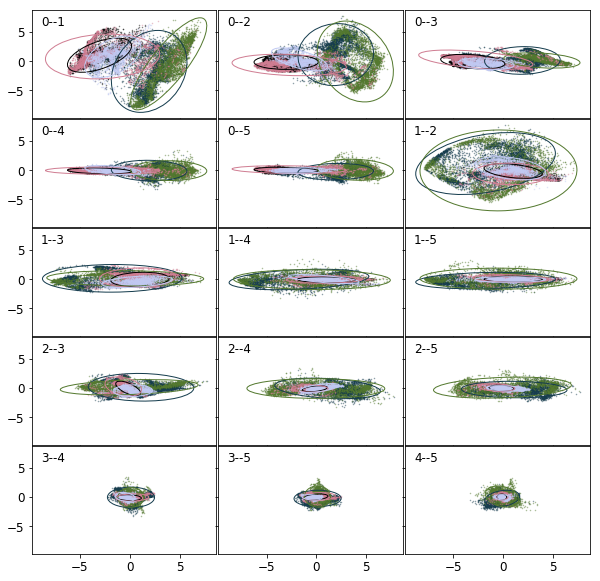

In [26]:
# TO HIDE

df_pca = pd.DataFrame(X_pca)
df_pca['Cls'] = df['Cls']

n_keep = 5
groups = sorted(df_pca.groupby(['Cls']), key = lambda x: x[1].size, reverse = True)[:n_keep]

fig, axes = plot_lofasz(groups, 'Cls', 6, 0.5)
fig.set_size_inches(10, 10)
plt.show()

#### Linear discriminant analysis

One can rightly point out that the binary combination of the PCA vectors (unit or zero coefficients) are not necessarily those that maximally separate the classes.

Linear Discriminant Analysis (LDA) assumes all classes are idenically distributed according to a normal distribution. Using this assumption it finds those projections of the data along which the classes are most separated. Using less than the all principal components posing the danger that some variables being discarded that might be important components of the separating planes. It is however reasonable to assume the separating planes are correlated with the principal components given the large number of classes. (On the other hand, it is not at all difficult to draw an example which would prove otherwise, but that would be a really contrieved one.)

To use LDA the data are required to be normal and identically distributed. If any of these criteria grossly violated, this classification method shall not be used, or at least can result in poor performance. Nevetheless the projections onto the 2D LDA hyperplanes are plotted below. The figure reassures us as to our assumption, that linear combinations of the vectors do not separate well the classes. (A cross validated LDA fit would result in approximately 80% accuracy.)

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_lda = lda.fit_transform(X, y)

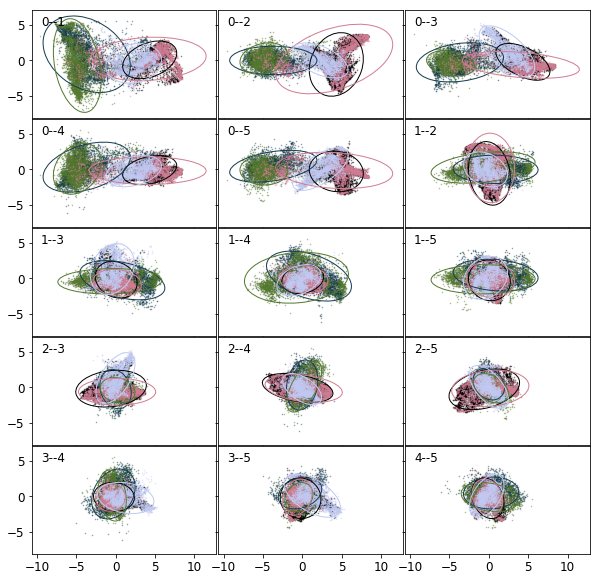

In [28]:
# TO HIDE

df_lda = pd.DataFrame(X_lda)
df_lda['Cls'] = df['Cls']

n_keep = 5
groups = sorted(df_lda.groupby(['Cls']), key = lambda x: x[1].size, reverse = True)[:n_keep]

fig, axes = plot_lofasz(groups, 'Cls', 6, 0.5)
fig.set_size_inches(10, 10)
plt.show()

### k-nearest neighbours

Separating planes, thus must be of higher order than linear. Unfortunately, quadratic discriminant analysis cannot be invoked for the low membership of certain classes. An other option is to use support vector machines with nonlinear kernels. 

Since the data are mingled, why not to use them directly to decide membership? A point is more likely to have a label identical to those of its neighbours. The k-nearest neighbour method utilises this idea.

#### Space to search in

The cost of running a KNN classfier depends on the dimension. It is thus advantageous the reduce the dimensionality of the data. LDA creates a series of projections along which the class separition is enhanced. There we use a succession of them to build the KNN classifier. 

In [29]:
from sklearn.neighbors import KNeighborsClassifier

lda = LDA()
pca = PCA()

knn = KNeighborsClassifier()

pipeline_lda = Pipeline([('lda', lda), ('knn', knn)])
pipeline_pca = Pipeline([('pca', pca), ('knn', knn)])

cv = KFold(n_splits = 5, shuffle = True)

param_grid_lda = [{'lda__n_components' : [4, 6, 8, 10]}]
param_grid_pca = [{'pca__n_components' : [4, 6, 8, 10]}]

grid_knn_lda = GridSearchCV(pipeline_lda, cv = cv, param_grid = param_grid_lda, 
                        scoring = scoring, 
                        refit = False,
                        return_train_score = False)

grid_knn_pca = GridSearchCV(pipeline_pca, cv = cv, param_grid = param_grid_pca, 
                        scoring = scoring, 
                        refit = False,
                        return_train_score = False)

_1 = grid_knn_lda.fit(X, y)
_2 = grid_knn_pca.fit(X, y)

The fact that PCA outperforms LDA at lower dimensions reminds us the fact the many assumptions of LDA is not met. At higher dimensions, both method perform equally well. In the following we choose PCA for feature enginnering.

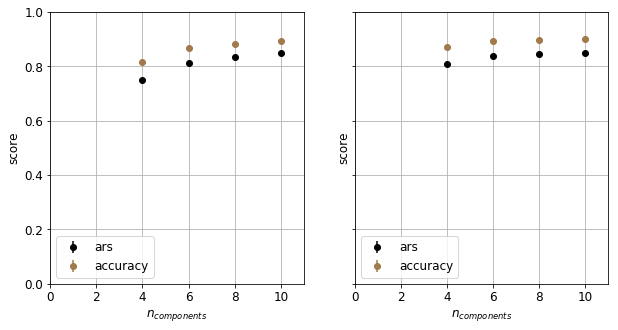

In [30]:
# TO HIDE

fig, axes = plt.subplots(1, 2, sharey = True)
fig.set_size_inches(10, 5)
axes[0].set_xlabel(r'$n_{components}$')
axes[1].set_xlabel(r'$n_{components}$')

kwargs = {'fmt' : 'o'}
plot_grd_search_cv_results_1D(grid_knn_lda.cv_results_, axes[0], plt.get_cmap('cubehelix'),  **kwargs)
plot_grd_search_cv_results_1D(grid_knn_pca.cv_results_, axes[1], plt.get_cmap('cubehelix'),  **kwargs)
plt.show()

#### Hyperparameter search

KNN can be percieved as a voting algorithm. The label of a datum is decided upon a handful its closest neighbours. Two notions ought to be specified, namely, _handful_ and _distance_.

Increasing the number of neighbours, decreaes the locality of the model, for further points are included in casting a vote on the class membership. The parameter `n_neighbors` specifies how many neighbours should be taken into account. The _distance_ between points is irrelevant when using the default settings of the KNN estimator. However, one might expect that data closer to a specific datum are more likely to have labels identical to that of the datum in question. If the `weights` parameter  is set to _distance_, points closer the contribute with larger weight to the decision on the class membership.

In [31]:
param_grid = {'pca__n_components' : [6, 8, 10, 12],
              'knn__n_neighbors' : [5, 10, 15],
              'knn__weights' : ['uniform', 'distance']}


grid = GridSearchCV(pipeline_pca, param_grid = param_grid, 
                    cv = cv,
                    scoring = scoring, 
                    refit = False, 
                    return_train_score = False)

_2 = grid.fit(X, y)

The variation of accuracy as a response to the hyperparameters is shown below. It plateus off beyond the tenth principal component in all settings. Taking intp account the distance of the neighbours leads to an increase of 1%. It is curious that the accuracy depends negatively on the number of neighbours. This can be attributed to the classes overlapping heavily.

In [32]:
# TO HIDE

results = pd.DataFrame(grid.cv_results_)
results = results.melt(id_vars = ["param_pca__n_components", "param_knn__weights",  "param_knn__n_neighbors"], 
        value_vars = ['split0_test_accuracy', 'split1_test_accuracy', 
                      'split2_test_accuracy', 'split3_test_accuracy',
                      'split4_test_accuracy'])

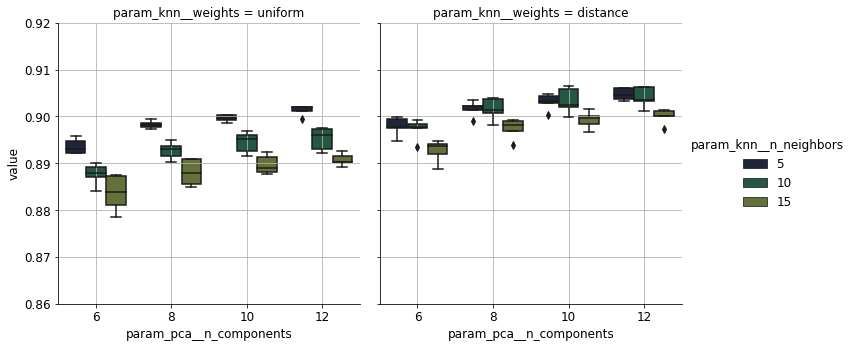

In [33]:
# TO HIDE

graph = sns.catplot(x = "param_pca__n_components", y = "value",  
            hue = "param_knn__n_neighbors", col = "param_knn__weights",
            data = results, kind = 'box',
            palette = sns.color_palette("cubehelix"))

for ax in graph.axes.flat:
    ax.set_ylim(0.86, 0.92)
    ax.grid(True)

plt.show()

## Summary

We have created a pipeline to classify climates based on the observed precipitation and temperature data. Using dinesionality reduction techniques and an optimised k-nearest neighbours classifier we have managed to achieve 90% accuracy.

### Further improvements

Considerable amount of time has been sacrificed to choose to generate features, and again some labour was needed to optimise the classifier. In a following post we are going to merge these two steps in a neural network.